In [1]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import KFold

In [2]:
train_data = pd.read_csv('../input/tabular-playground-series-oct-2021/train.csv')

In [3]:
train_data.head()

,id,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f276,f277,f278,f279,f280,f281,f282,f283,f284,target
0,0,0.205979,0.410993,0.176775,0.223581,0.423543,0.476140,0.413590,0.612021,0.534873,...,0,1,0,0,0,0,0,0,0,1
1,1,0.181004,0.473119,0.011734,0.213657,0.619678,0.441593,0.230407,0.686013,0.281971,...,0,1,0,0,0,0,0,0,0,1
2,2,0.182583,0.307431,0.325950,0.207116,0.605699,0.309695,0.493337,0.751107,0.536272,...,0,0,0,1,1,0,0,0,0,1
3,3,0.180240,0.494592,0.008367,0.223580,0.760618,0.439211,0.432055,0.776147,0.483958,...,0,0,0,0,1,0,0,0,0,1
4,4,0.177172,0.495513,0.014263,0.548819,0.625396,0.562493,0.117158,0.561255,0.077115,...,0,1,1,0,1,0,0,1,0,1


In [4]:
train_data.shape

(1000000, 287)

In [5]:
1000000//10  # we will make 20 folds

100000

In [6]:
kf = KFold(n_splits=10, shuffle=True, random_state=202)

In [7]:
train_data['fold'] = -1

In [8]:
train_data.head(2)

,id,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f277,f278,f279,f280,f281,f282,f283,f284,target,fold
0,0,0.205979,0.410993,0.176775,0.223581,0.423543,0.476140,0.413590,0.612021,0.534873,...,1,0,0,0,0,0,0,0,1,-1
1,1,0.181004,0.473119,0.011734,0.213657,0.619678,0.441593,0.230407,0.686013,0.281971,...,1,0,0,0,0,0,0,0,1,-1


In [9]:
for fold, (train_indices, valid_indices) in enumerate(kf.split(train_data)):
    #print(fold)
    train_data.loc[valid_indices,'fold'] = fold

In [10]:
train_data.head(3)

,id,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f277,f278,f279,f280,f281,f282,f283,f284,target,fold
0,0,0.205979,0.410993,0.176775,0.223581,0.423543,0.476140,0.413590,0.612021,0.534873,...,1,0,0,0,0,0,0,0,1,1
1,1,0.181004,0.473119,0.011734,0.213657,0.619678,0.441593,0.230407,0.686013,0.281971,...,1,0,0,0,0,0,0,0,1,9
2,2,0.182583,0.307431,0.325950,0.207116,0.605699,0.309695,0.493337,0.751107,0.536272,...,0,0,1,1,0,0,0,0,1,3


In [11]:
train_data['target'].value_counts()

1    500485
0    499515
Name: target, dtype: int64

<AxesSubplot:>

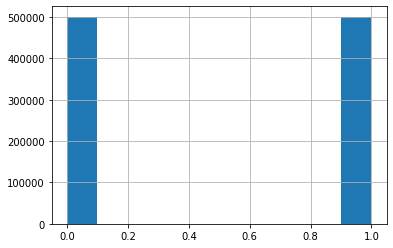

In [12]:
train_data['target'].hist()

<AxesSubplot:>

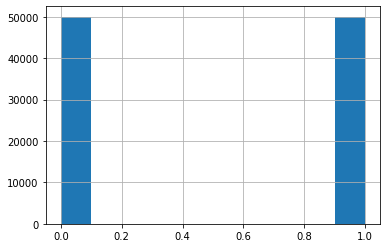

In [13]:
train_data.loc[train_data['fold']==9,'target'].hist()

In [14]:
train_data.groupby("fold")['target'].value_counts(normalize=True)

fold  target
0     1         0.50341
      0         0.49659
1     0         0.50162
      1         0.49838
2     1         0.50015
      0         0.49985
3     1         0.50127
      0         0.49873
4     1         0.50092
      0         0.49908
5     0         0.50009
      1         0.49991
6     1         0.50136
      0         0.49864
7     0         0.50012
      1         0.49988
8     0         0.50060
      1         0.49940
9     1         0.50017
      0         0.49983
Name: target, dtype: float64

In [15]:
train_data['target'].value_counts()

1    500485
0    499515
Name: target, dtype: int64

In [16]:
train_data.to_csv('Oct_folds.csv',index=False)